In [1]:
import sys,os,glob,copy
sys.path.append('../')
import numpy as np
from numpy.linalg import norm
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.interpolate import LinearNDInterpolator,interp2d, griddata
from itertools import product
import matplotlib as mpl
from matplotlib.colors import LogNorm
from IPython.display import display, Markdown
import glob
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=2.0)
cm = plt.cm.get_cmap('RdYlBu')


pd.set_option('display.max_rows', 200)

### Load Recast Data

In [2]:
recastData = pd.read_pickle('../newWino_scan.pcl')
recastData = recastData.round({'tau_ns' : 2, 'mLLP' : 2})
print(len(recastData))

216


In [3]:
recastData['totalEff-Low'] = recastData['(SR-Low - no mass Window)'].str[1]
recastData['totalEff-High'] = recastData['(SR-High - no mass Window)'].str[1]

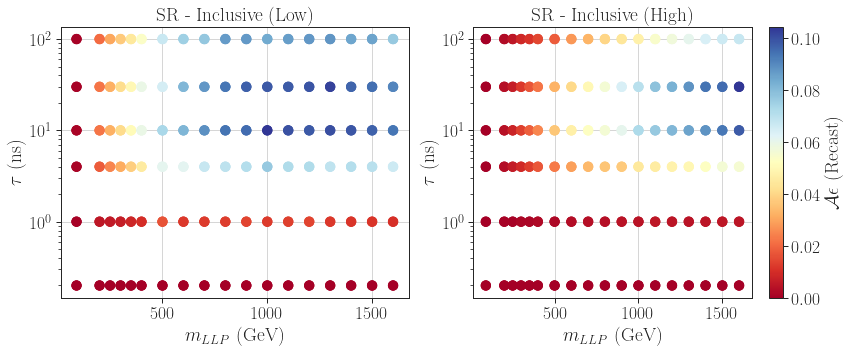

In [6]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,5))

x,y,z = recastData['mLLP'], recastData['tau_ns'], recastData['totalEff-Low']

ax[0].scatter(x=x,y=y,c=z,cmap=cm,s=90)

ax[0].set_xlabel(r'$m_{LLP}$ (GeV)')
ax[0].set_ylabel(r'$\tau$ (ns)')

z = recastData['totalEff-High']
im = ax[1].scatter(x=x,y=y,c=z,cmap=cm,s=90)

ax[1].set_xlabel(r'$m_{LLP}$ (GeV)')
ax[1].set_ylabel(r'$\tau$ (ns)')


# plt.ylim(500,1200)
# plt.xlim(1,90)
# plt.yticks(np.arange(500.,1200.,100.))
ax[0].grid()
ax[0].set_yscale('log')
ax[0].set_title('SR - Inclusive (Low)')


ax[1].grid()
ax[1].set_yscale('log')
ax[1].set_title('SR - Inclusive (High)')
plt.colorbar(im,label=r'$\mathcal{A}\epsilon$ (Recast)')
# plt.colorbar(im,label=r'$\mathcal{A}\epsilon$ (Recast)/$\mathcal{A} \epsilon$ (ATLAS)',cax=ax )
# plt.text(0.1,0.7,textstr,fontsize=16,bbox=dict(facecolor='none', edgecolor='black'),
#          transform = plt.gca().transAxes)
# plt.savefig('effRatio.png')
plt.tight_layout()
plt.show()

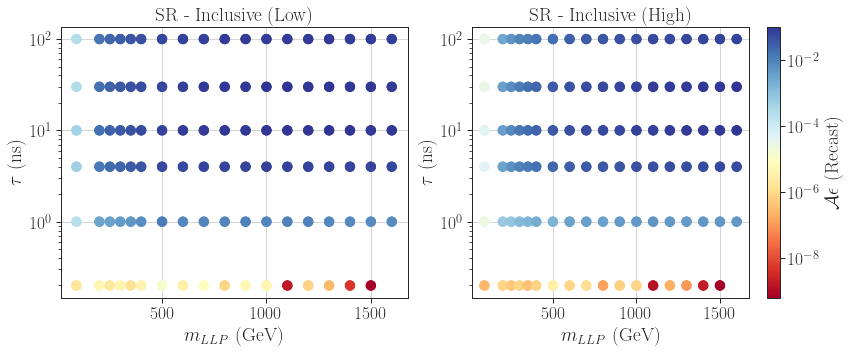

In [26]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,5))

x,y,z = recastData['mLLP'], recastData['tau_ns'], recastData['totalEff-Low']

ax[0].scatter(x=x,y=y,c=z,cmap=cm,s=90,norm=LogNorm())

ax[0].set_xlabel(r'$m_{LLP}$ (GeV)')
ax[0].set_ylabel(r'$\tau$ (ns)')

z = recastData['totalEff-High']
im = ax[1].scatter(x=x,y=y,c=z,cmap=cm,s=90,norm=LogNorm())

ax[1].set_xlabel(r'$m_{LLP}$ (GeV)')
ax[1].set_ylabel(r'$\tau$ (ns)')


# plt.ylim(500,1200)
# plt.xlim(1,90)
# plt.yticks(np.arange(500.,1200.,100.))
ax[0].grid()
ax[0].set_yscale('log')
ax[0].set_title('SR - Inclusive (Low)')


ax[1].grid()
ax[1].set_yscale('log')
ax[1].set_title('SR - Inclusive (High)')
plt.colorbar(im,label=r'$\mathcal{A}\epsilon$ (Recast)')
# plt.colorbar(im,label=r'$\mathcal{A}\epsilon$ (Recast)/$\mathcal{A} \epsilon$ (ATLAS)',cax=ax )
# plt.text(0.1,0.7,textstr,fontsize=16,bbox=dict(facecolor='none', edgecolor='black'),
#          transform = plt.gca().transAxes)
# plt.savefig('effRatio.png')
plt.tight_layout()
plt.show()

### Estimate number of MC events used to compute the efficiency
##### (the estimative is not exact, because the events are weighted and filtered, so we use the cutflow to approximately remove the weights)

In [24]:
effMC = []
for irow,row in recastData.iterrows():
    mc_after_cuts = row['$m_{T}({track},{p}_{{T}}^{{ miss}}) > 130$ GeV'][1]/row['$E_{T}^{miss}>170$ GeV'][1]
    mc_after_cuts = mc_after_cuts*row['Total MC Events']
    effMC.append(mc_after_cuts)
recastData['effMCevents'] = effMC

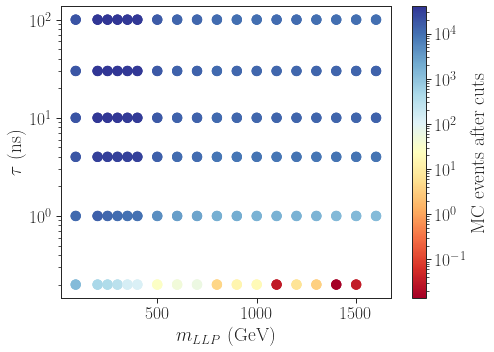

In [29]:
fig = plt.figure(figsize=(7,5))

x,y,z = recastData['mLLP'], recastData['tau_ns'], recastData['effMCevents']

plt.scatter(x=x,y=y,c=z,cmap=cm,s=90,norm=LogNorm())

plt.xlabel(r'$m_{LLP}$ (GeV)')
plt.ylabel(r'$\tau$ (ns)')
plt.yscale('log')
plt.colorbar(label='MC events after cuts')
plt.tight_layout()
plt.show()